In [1]:
# Import and Configuration
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.cloud import bigquery

from THC2_class import GoogleCloudProject

Thc2 = GoogleCloudProject('take-home-challenge-n2')

print(Thc2.__str__())

# nom du projet sur Google Cloud Project
# projectId = 'take-home-challenge-n2'
# add your own credentials key
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "credentials.json"
client_THC2 = bigquery.Client(project=Thc2.projectId)

Your project Id is take-home-challenge-n2


In [2]:
# Get the DataSet Id
Thc2.GetDataSetId(client=client_THC2)

# Get the different table Id
listTables = Thc2.GetTableId(client=client_THC2)
print('Name of the different tables : ',listTables)

Name of the DataSet used : dbt_THC2
Name of the different tables :  ['Bitcoin_Cash', 'Data_Mart_Table', 'Staging_Table']


Materialise a data mart table that gives the current balance for all addresses and
exclude addresses that had at least one transaction on Coinbase.

In [3]:
# @ Perform a query from the DataMart Table located in the Google Cloud Project
DataMartTable = Thc2.PerformAQuery_forDataMart(client=client_THC2)
DataMartTable

Addresses       Balance
0      af27cde105ad685ee3a289aa12552487c97aee711adb6a...  5.460000e+02
1      0308123d987060c857c2200d6ba865fb67bdbccc580579...  5.460000e+02
2      abb679e35ed898d68a20baefd018eb6fa9efc4f095097b...  5.460000e+02
3      81983e6254f5ea5857f52e87777fe3f827cdea96228e6e...  5.460000e+02
4      8fe198312d7ba3295301f0b56315b9a8a46edde9bbc715...  1.122560e+05
...                                                  ...           ...
99995  154eafe272f540a8ee11f5f0fa80d9419c87f8fe7cb3dd...  3.404199e+12
99996  a598c4c345030d0f0e08b4df61f5cdfc29853a674ee36a...  6.171908e+12
99997  ba27382db12fc74e5c2bab229eccd61e83fee8adccc991...  2.490000e+12
99998  3fcff81c4137cd9621ca1d6a28084d51e42f0edb94a77e...  3.035977e+12
99999  3e74dab3e78bf4e22cd997f66ad6eabf45aa5ebe794a88...  2.537708e+12

[100000 rows x 2 columns]

In [4]:
# Perform a query from the Staging Table located in the Google Cloud Project
Graph_DataFrame = Thc2.PerformAQuery_forGraph(client=client_THC2)
Graph_DataFrame


DateTime  MoneyForaDate
0   2022-10-01   5.931362e+12
1   2022-10-02   5.134571e+12
2   2022-10-03   5.568449e+12
3   2022-10-04   1.378051e+13
4   2022-10-05   9.120587e+12
..         ...            ...
62  2022-12-02   1.336819e+13
63  2022-12-03   9.318242e+12
64  2022-12-04   7.841634e+12
65  2022-12-05   8.564875e+12
66  2022-12-06   9.642476e+12

[67 rows x 2 columns]

Display the amount of transactions on the Y axis with the date on the X axis.

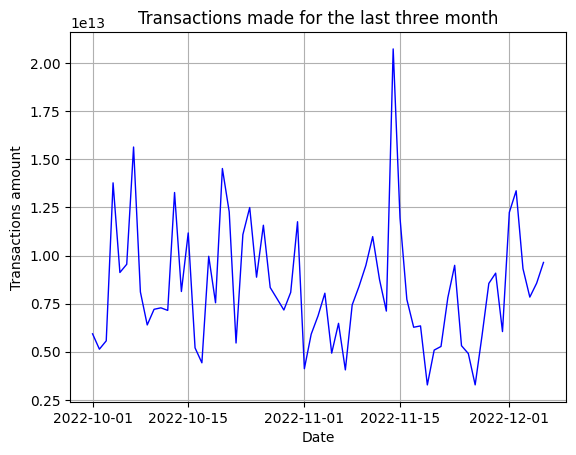

In [5]:
df_graph = pd.DataFrame(Graph_DataFrame)
Thc2.ShowGraph_DataMart(df_graph, 'Transactions made for the last three month', 'Date', 'Transactions amount')